In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

In [5]:
x0

tensor([[ 2.0957,  1.3035],
        [ 3.6338,  2.3271],
        [-0.2484,  4.1587],
        [ 1.5456,  4.1182],
        [ 2.1069,  1.8865],
        [ 1.2245,  2.4721],
        [ 2.8048,  3.0871],
        [-0.4781,  3.3063],
        [ 2.7826,  1.8327],
        [ 2.1755,  1.5327],
        [ 2.2007,  0.9367],
        [ 2.3919, -0.0755],
        [ 3.0325,  1.6183],
        [ 2.9608,  1.7023],
        [ 3.9009,  3.6921],
        [ 4.3665,  2.7742],
        [ 1.0709,  2.8585],
        [ 2.8287,  1.5700],
        [ 0.2144,  3.6132],
        [ 1.2473,  2.5735],
        [ 1.2825,  3.5168],
        [ 3.2661,  2.1593],
        [ 1.8915,  2.1514],
        [ 1.4838,  1.0116],
        [ 1.2711,  1.4238],
        [ 2.8075,  2.0364],
        [ 3.6640,  2.0415],
        [ 2.0465,  3.9086],
        [ 3.6365,  1.6750],
        [ 2.3624,  2.1996],
        [ 2.0871,  0.1596],
        [ 0.5159,  0.9724],
        [ 3.8001,  0.9099],
        [ 1.1022, -0.8067],
        [ 2.3448,  3.1674],
        [ 1.8737,  1

In [3]:
print(x[:10])
print(y)

tensor([[ 2.0957,  1.3035],
        [ 3.6338,  2.3271],
        [-0.2484,  4.1587],
        [ 1.5456,  4.1182],
        [ 2.1069,  1.8865],
        [ 1.2245,  2.4721],
        [ 2.8048,  3.0871],
        [-0.4781,  3.3063],
        [ 2.7826,  1.8327],
        [ 2.1755,  1.5327]])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


# Neural network

![net.jpg](net.jpg)

In [16]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        # self.hidden2 = torch.nn.Linear(n_hidden, n_hidden) 
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        # x = self.out(x)
        x = F.softmax(self.out(x))
        return x

![relu.jpeg](relu.jpeg)

In [17]:
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [18]:
net.forward(torch.Tensor([2, 2]))

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([0.4386, 0.5614], grad_fn=<SoftmaxBackward>)

# Loss & Opitimizer

In [30]:
print(*net.parameters())

Parameter containing:
tensor([[-0.2822, -0.1035],
        [ 0.4155, -0.6705],
        [-0.0912,  0.0635],
        [ 0.6677, -0.4789],
        [-0.6915, -0.1588],
        [ 0.4506,  0.1220],
        [ 0.5006,  0.2283],
        [ 0.0097,  0.8992],
        [ 0.1016, -0.5388],
        [ 0.0717,  0.5784]], requires_grad=True) Parameter containing:
tensor([ 0.2801, -0.3549, -0.4934,  0.3397,  0.3966, -0.2035,  0.2963, -0.3262,
        -0.0396, -0.4763], requires_grad=True) Parameter containing:
tensor([[-0.1094,  0.0329,  0.1957,  0.2930, -0.4604,  0.0463,  0.4063,  0.3578,
         -0.1826,  0.1963],
        [ 0.3080,  0.1552, -0.0635,  0.0719,  0.2297, -0.3733, -0.0506, -0.4342,
          0.2655, -0.0636]], requires_grad=True) Parameter containing:
tensor([-0.1706, -0.0115], requires_grad=True)


In [32]:
# hidden layer
print(*net.hidden.parameters())

Parameter containing:
tensor([[-0.2822, -0.1035],
        [ 0.4155, -0.6705],
        [-0.0912,  0.0635],
        [ 0.6677, -0.4789],
        [-0.6915, -0.1588],
        [ 0.4506,  0.1220],
        [ 0.5006,  0.2283],
        [ 0.0097,  0.8992],
        [ 0.1016, -0.5388],
        [ 0.0717,  0.5784]], requires_grad=True) Parameter containing:
tensor([ 0.2801, -0.3549, -0.4934,  0.3397,  0.3966, -0.2035,  0.2963, -0.3262,
        -0.0396, -0.4763], requires_grad=True)


In [33]:
# out layer
print(*net.out.parameters())

Parameter containing:
tensor([[-0.1094,  0.0329,  0.1957,  0.2930, -0.4604,  0.0463,  0.4063,  0.3578,
         -0.1826,  0.1963],
        [ 0.3080,  0.1552, -0.0635,  0.0719,  0.2297, -0.3733, -0.0506, -0.4342,
          0.2655, -0.0636]], requires_grad=True) Parameter containing:
tensor([-0.1706, -0.0115], requires_grad=True)


In [21]:
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted
optimizer = torch.optim.SGD(net.parameters(), lr=0.02) # 梯度下降

In [20]:
plt.ion()

In [23]:
loss_list = []
accuracy_list = []
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted
    loss_list.append(loss)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = y.data.numpy()
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    accuracy_list.append(accuracy)

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


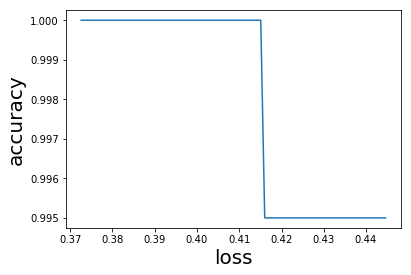

In [27]:
plt.plot(loss_list, accuracy_list)
plt.xlabel('loss', fontsize = 20)
plt.ylabel('accuracy', fontsize = 20);

/Users/datalab/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


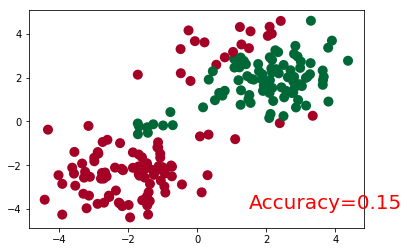

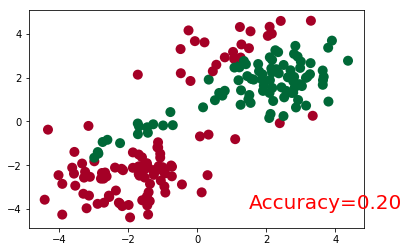

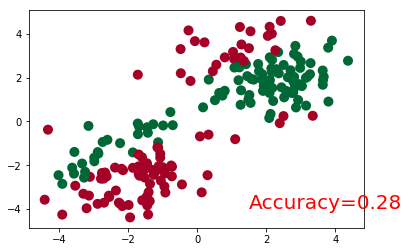

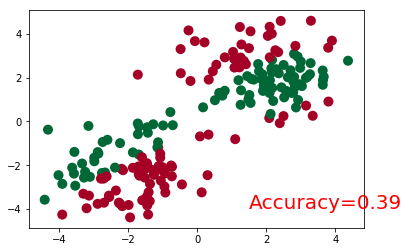

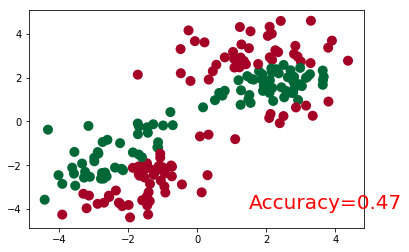

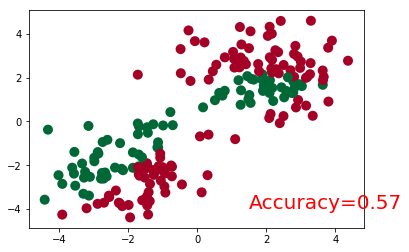

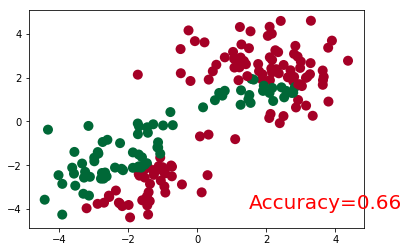

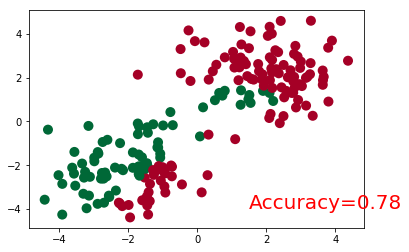

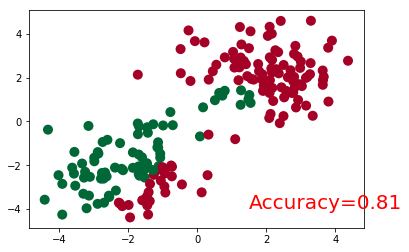

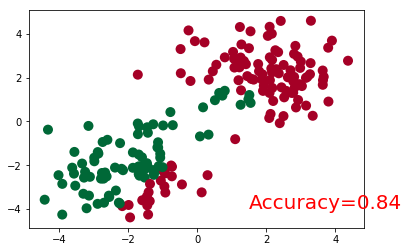

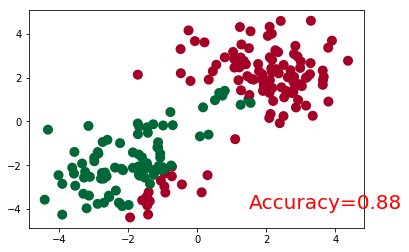

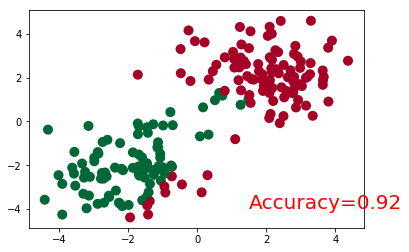

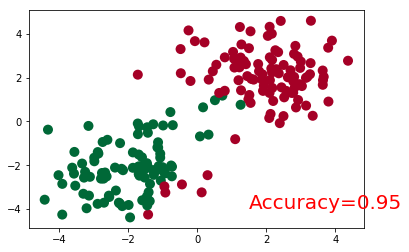

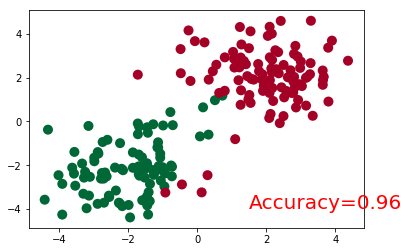

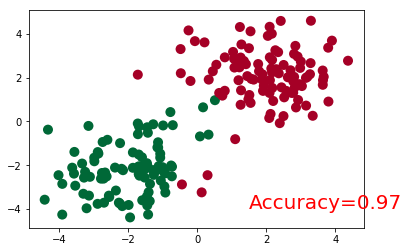

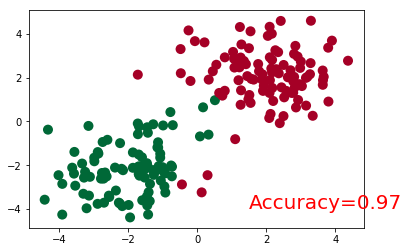

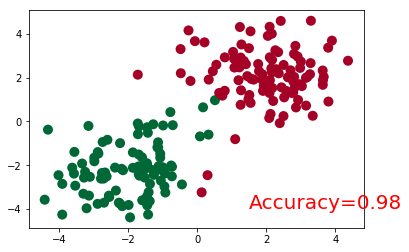

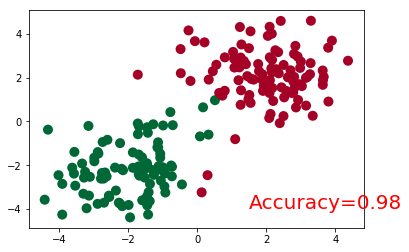

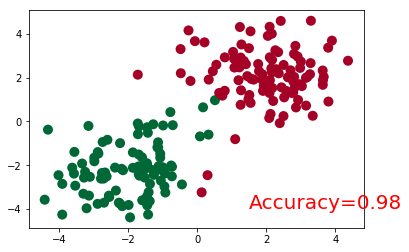

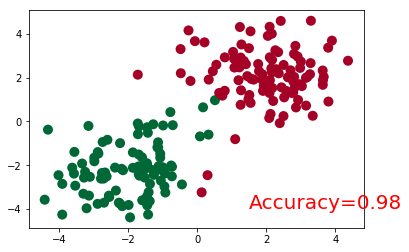

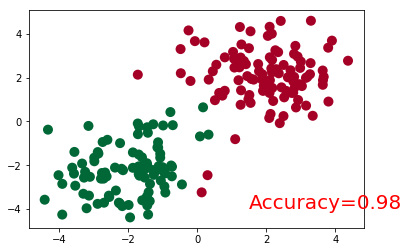

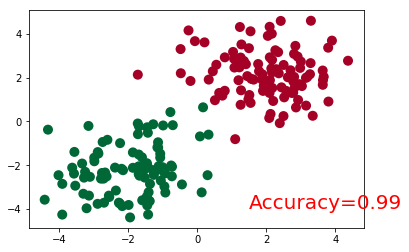

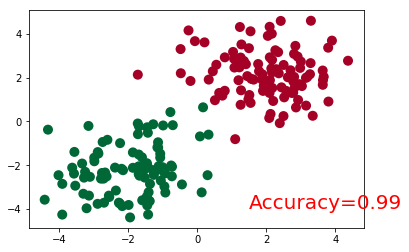

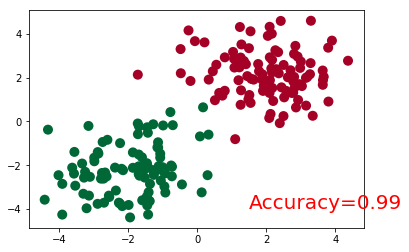

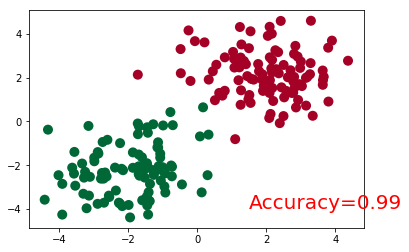

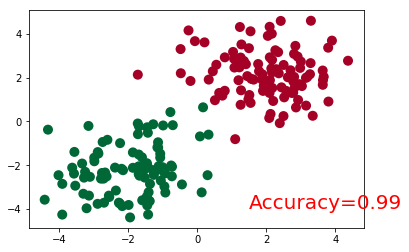

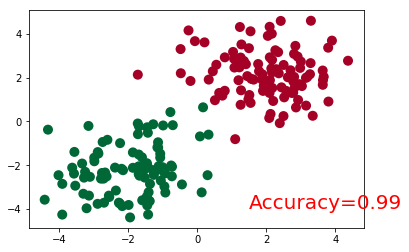

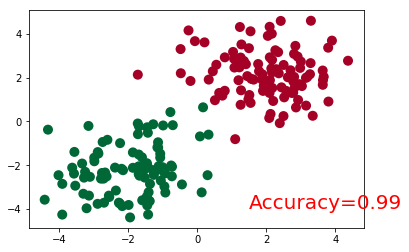

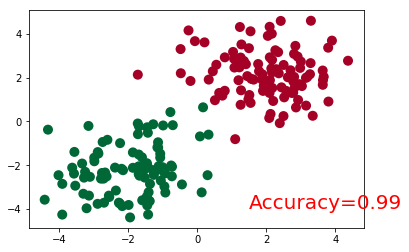

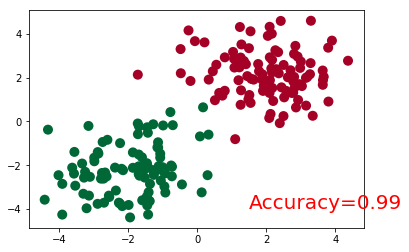

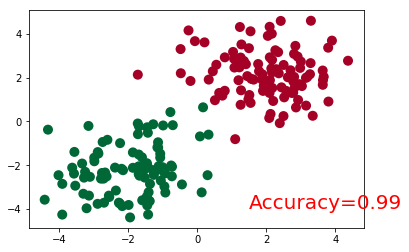

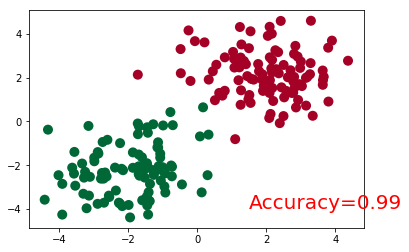

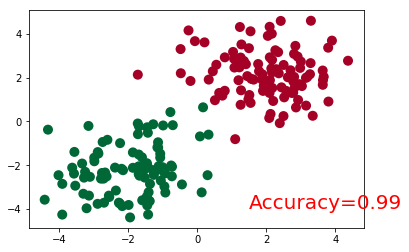

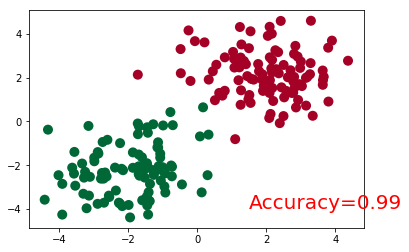

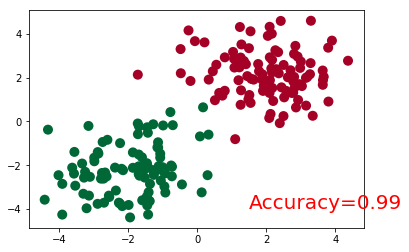

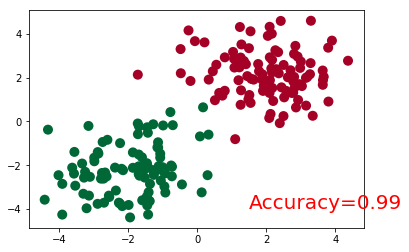

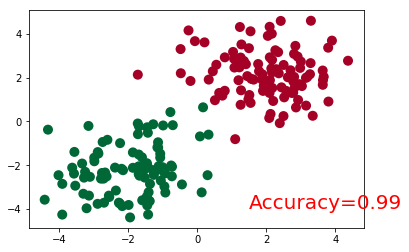

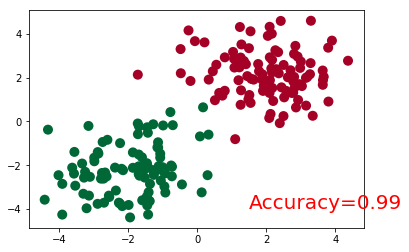

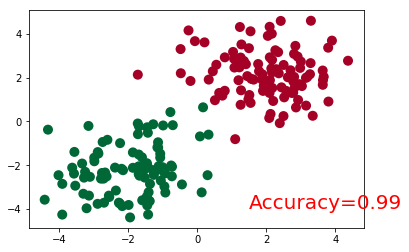

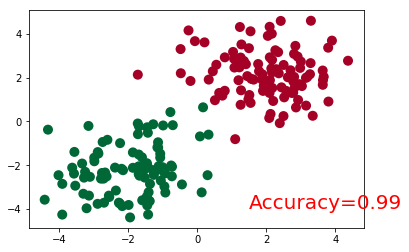

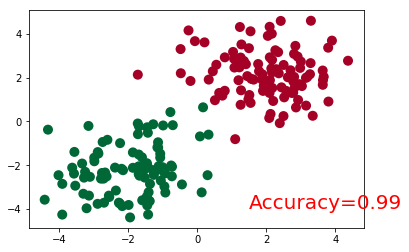

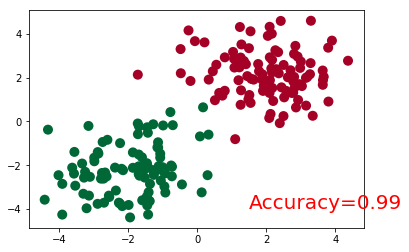

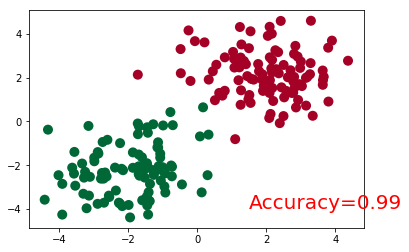

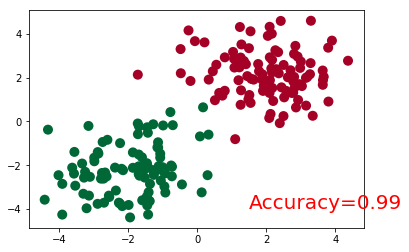

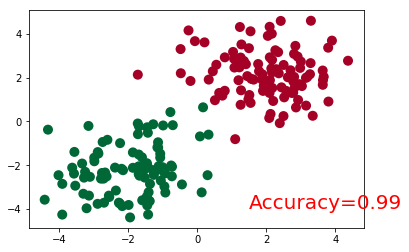

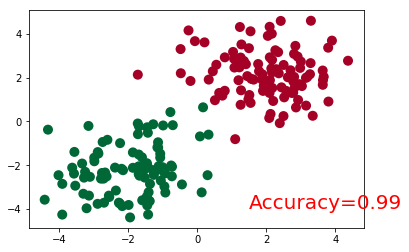

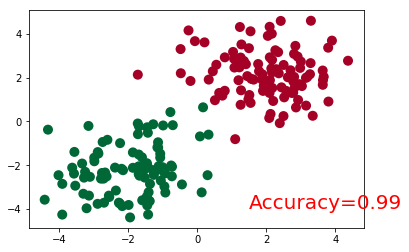

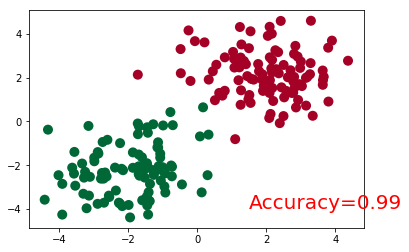

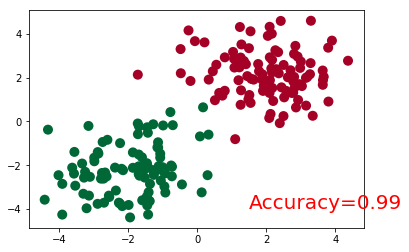

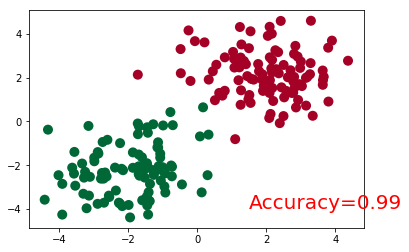

In [22]:
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()